In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
yr = 2023
mth = 1
day = 2
hr = 13
min = 30
sec = 15

In [3]:
my_date = datetime(yr, mth, day)
my_date

datetime.datetime(2023, 1, 2, 0, 0)

In [4]:
my_date_time = datetime(yr, mth, day, hr, min, sec)
my_date_time

datetime.datetime(2023, 1, 2, 13, 30, 15)

In [5]:
type(my_date)

datetime.datetime

### Using NumPy's datetime object

In [6]:
date_arr = np.array(['2023-03-15', '2023-04-23'], dtype = 'datetime64')
date_arr

array(['2023-03-15', '2023-04-23'], dtype='datetime64[D]')

In [10]:
np.arange('2018-06-01', '2018-06-23', 7, dtype = 'datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [11]:
np.arange('1968', '1976', dtype = 'datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

### Datetime index with Pandas

In [12]:
pd.date_range('2020-01-01', periods = 7, freq = 'D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range('Jan 01, 2018', periods = 7, freq = 'D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.to_datetime(['1/02/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [15]:
# pandas stores all it's dates in the yyyy-mm-dd format but we can specift how to interpret the dates
pd.to_datetime(['1/02/2018', '03/01/2018'], format = '%d/%m/%Y')

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime(['1-02-2018', '03-01-2018'], format = '%d-%m-%Y')

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [17]:
data = np.random.randn(3, 2)
cols = ['A', 'B']
print(data)

[[ 1.74708684  0.27623636]
 [-1.85676008 -0.69597379]
 [ 0.05975629  0.98070401]]


In [18]:
idx = pd.date_range('2020-01-01', periods = 3, freq = 'D')
df = pd.DataFrame(data, index = idx, columns = cols)

In [19]:
df

,A,B
2020-01-01,1.747087,0.276236
2020-01-02,-1.856760,-0.695974
2020-01-03,0.059756,0.980704


In [21]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

## Time Resampling

In [26]:
# read starbucks stock closing data
df = pd.read_csv('Data/starbucks.csv', index_col = 'Date', parse_dates = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [27]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [28]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [29]:
# the data is daily right now, resampling is similar to a groupby or aggregate function
# alias for different rules can be found in the time sampling notebook
df.resample(rule = 'A')

In [30]:
df.resample(rule = 'A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


### Custom Resampling Function

In [31]:
def first_day(entry):
    
    # if entry exists, return first entry
    if len(entry):
        return entry[0]

In [32]:
df.resample(rule = 'A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [33]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [35]:
df['Close'].resample(rule = 'A').mean()

Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

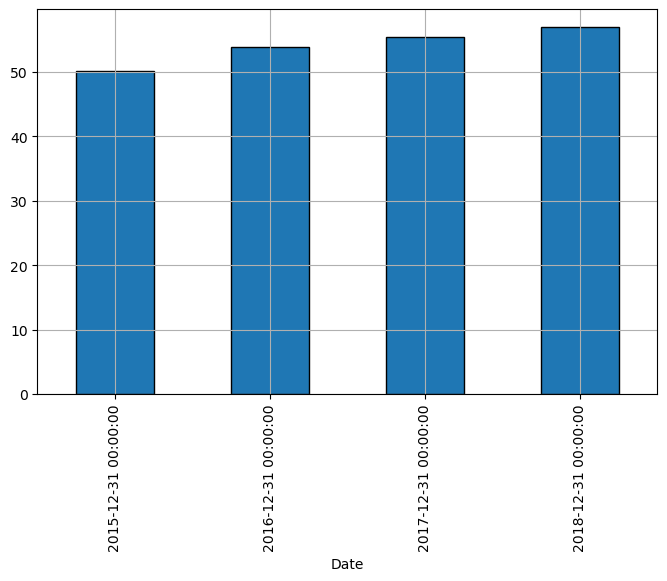

In [38]:
df['Close'].resample(rule = 'A').mean().plot.bar(figsize = (8, 5), edgecolor = 'k', grid = True)

<Axes: title={'center': 'Starbucks Daily Closing'}, xlabel='Date'>

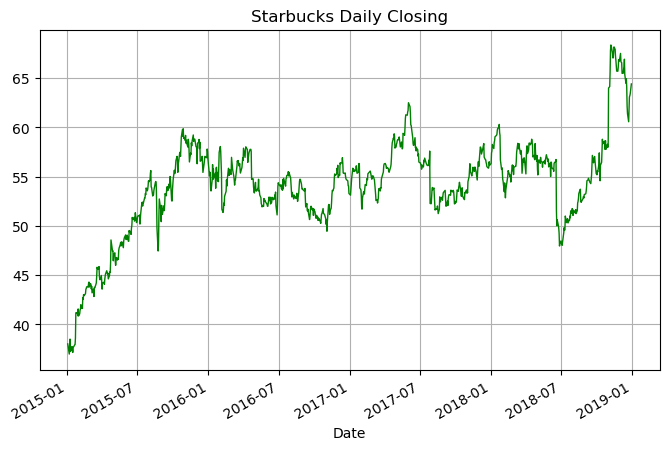

In [42]:
df['Close'].plot.line(figsize=(8, 5), ls = '-', lw = 1, color = 'green', grid = True, title = "Starbucks Daily Closing")

## Time Shifting

In [43]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [44]:
df.shift(1)
# the last datapoint is lost

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [45]:
# shifting backwards
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [46]:
# shifting index values based on frequency in this case the data is shifted by a month
df.shift(periods = 1, freq = 'M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


In [47]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


## Rolling and Expanding
Applying aggregate functions over a certain window.

<Axes: title={'center': 'Starbucks Daily Closing'}, xlabel='Date'>

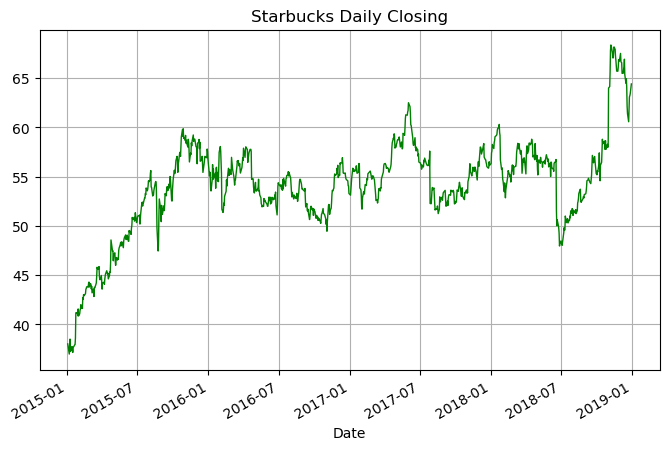

In [48]:
df['Close'].plot.line(figsize=(8, 5), ls = '-', lw = 1, color = 'green', grid = True, title = "Starbucks Daily Closing")

In [50]:
# rolling mean
df.rolling(window = 7).mean().head(21)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<Axes: title={'center': 'Starbucks Closing Moving Average'}, xlabel='Date'>

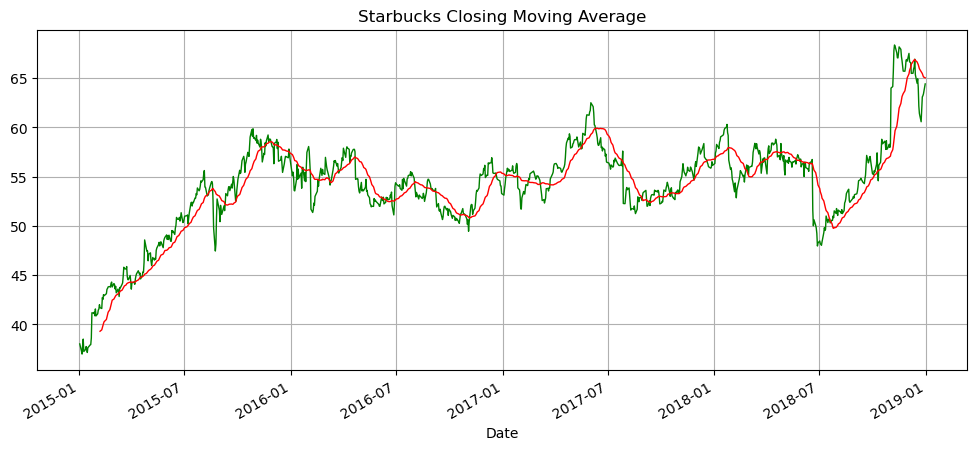

In [59]:

df['Close'].plot.line(figsize=(12, 5), ls = '-', lw = 1, color = 'green', grid = True)
df.rolling(window = 25).mean()['Close'].plot.line(figsize=(12, 5), ls = '-', lw = 1, color = 'red', grid = True, title = "Starbucks Closing Moving Average")

In [60]:
# create a new col to store moving average
df['Moving Average 25'] = df.rolling(window = 25).mean()['Close']

<Axes: xlabel='Date'>

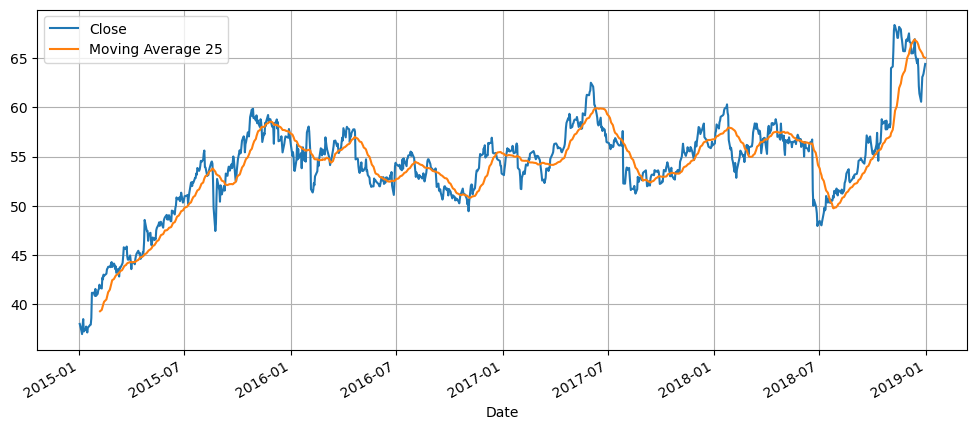

In [61]:
df[['Close', 'Moving Average 25']].plot(figsize = (12, 5), grid = True)

<Axes: xlabel='Date'>

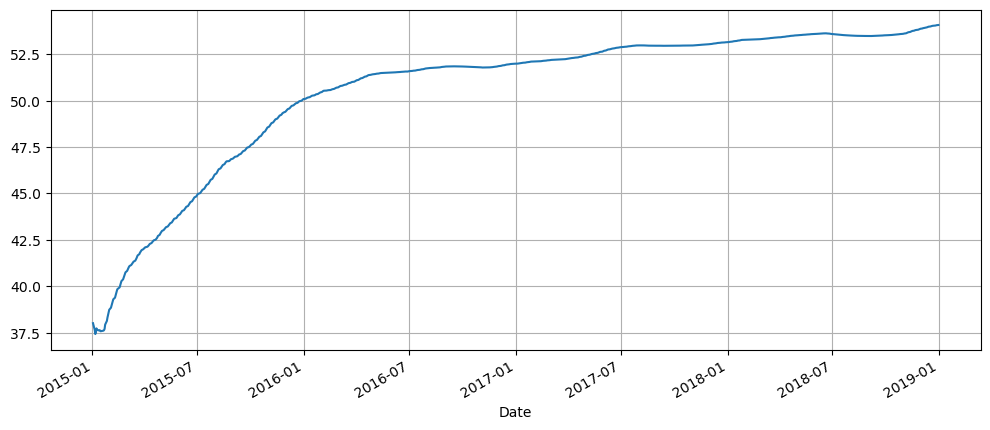

In [62]:
# expanding: cumulative average
df['Close'].expanding().mean().plot(figsize = (12, 5), grid = True)

In [63]:
df.drop(['Moving Average 25'], axis = 1, inplace = True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

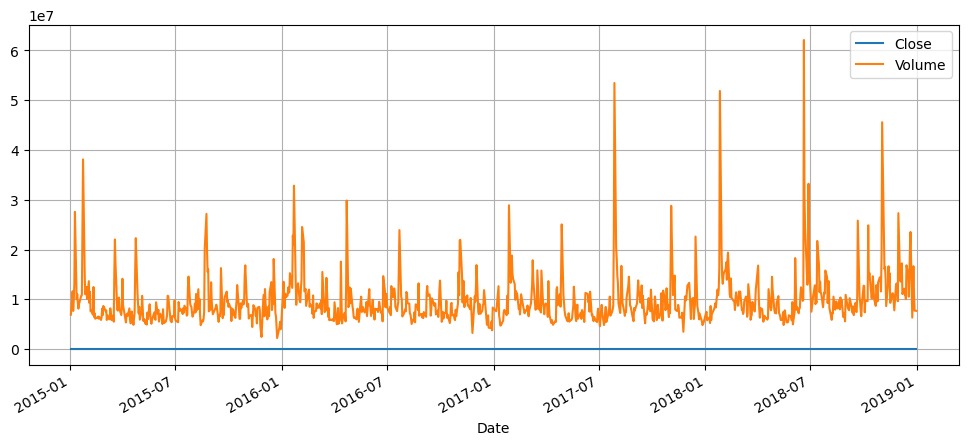

In [66]:
df.plot(figsize = (12, 5), grid = True)

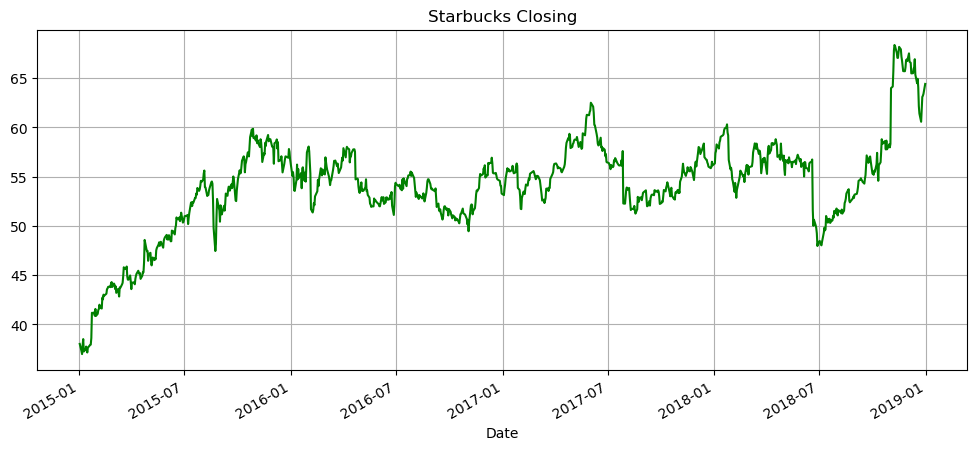

In [72]:
df.Close.plot(figsize=(12,5), grid = True, color = 'green', title = 'Starbucks Closing');

<Axes: title={'center': 'Starbucks Volume'}, xlabel='Date'>

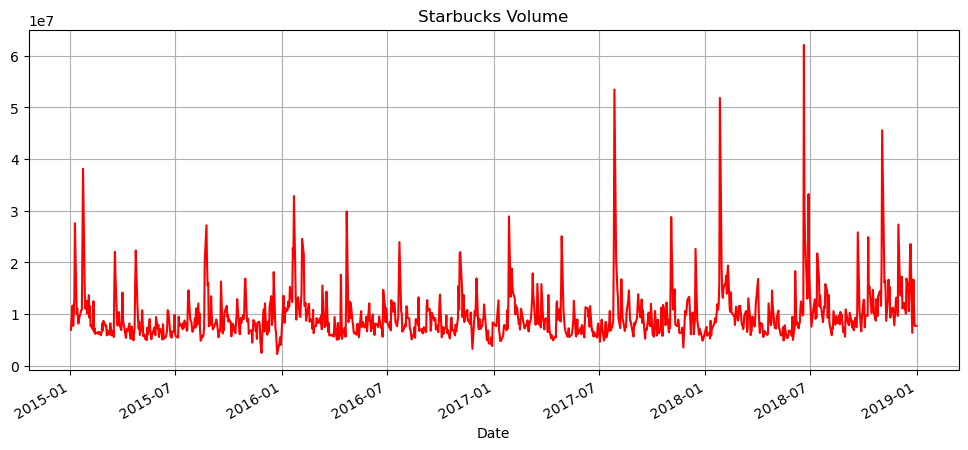

In [73]:
df.Volume.plot(figsize = (12, 5), grid = True, color = 'red', title = 'Starbucks Volume')

### Autoscaling

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Value')]

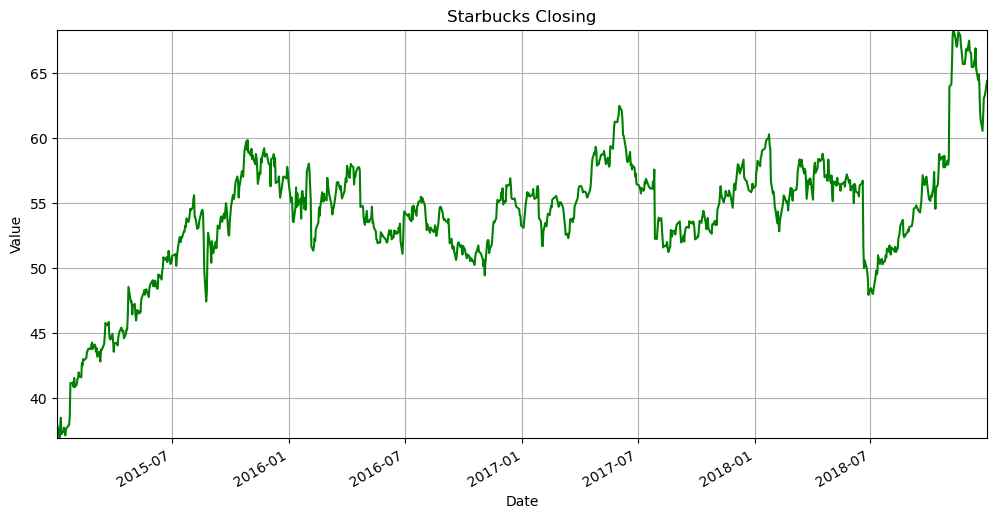

In [83]:
ax = df['Close'].plot(figsize=(12,6), grid = True, color = 'green', title = 'Starbucks Closing');
ax.autoscale(axis = 'both', tight = True)
ax.set(xlabel = 'Date', ylabel = 'Value')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Vol')]

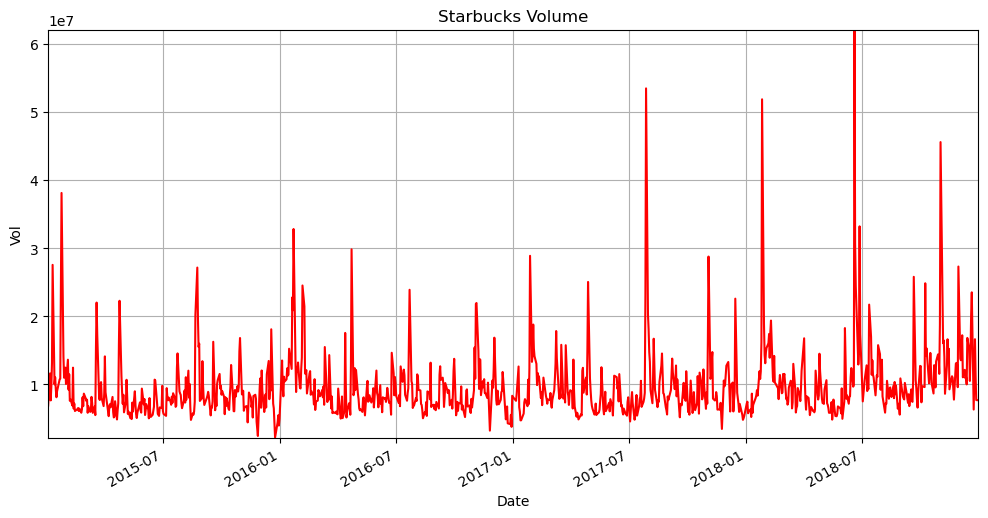

In [84]:
ax = df['Volume'].plot(figsize=(12,6), grid = True, color = 'red', title = 'Starbucks Volume');
ax.autoscale(axis = 'both', tight = True)
ax.set(xlabel = 'Date', ylabel = 'Vol')

### Plotting specific portions

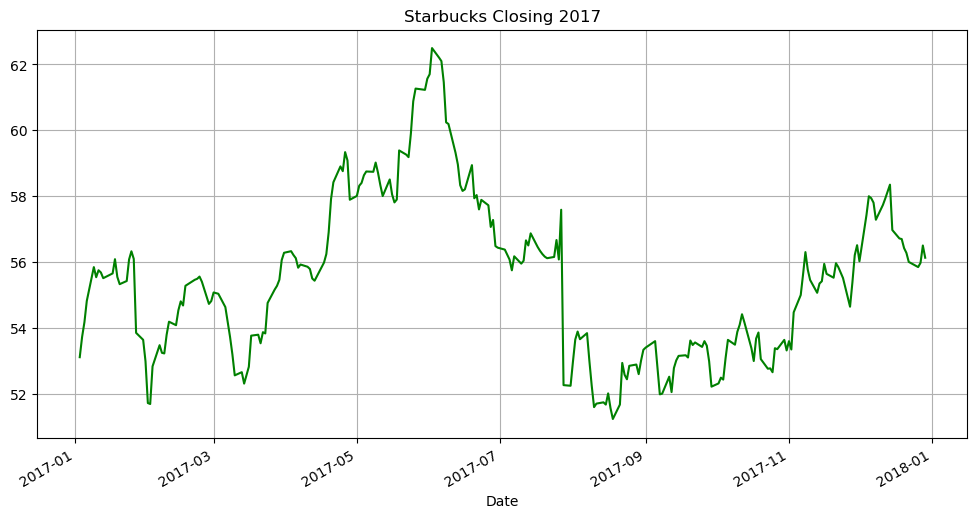

In [85]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,6), grid = True, color = 'green', title = 'Starbucks Closing 2017');

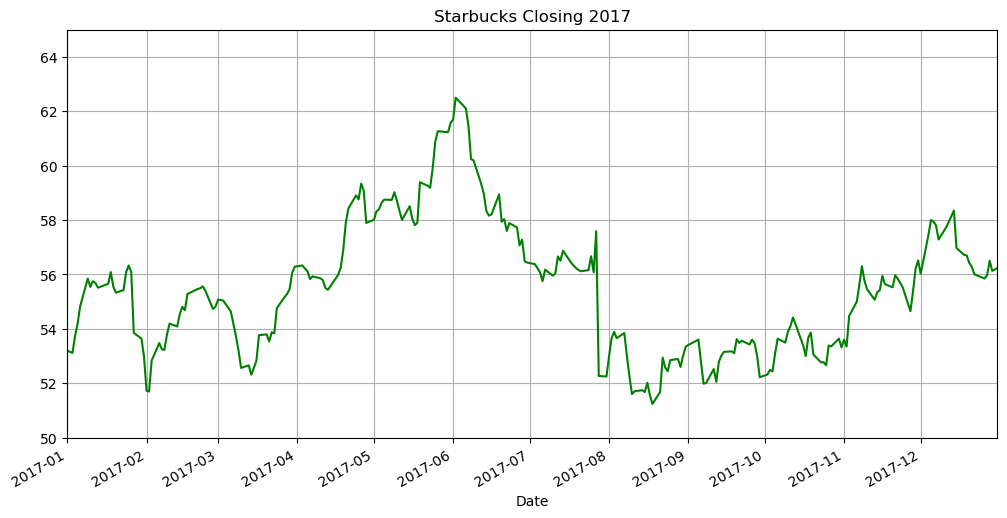

In [89]:
# we can also do
df['Close'].plot(figsize=(12,6), xlim = ['2017-01-01','2017-12-31'],
                 ylim = [50, 65], grid = True, color = 'green', title = 'Starbucks Closing 2017');

<Axes: title={'center': 'Volume 2017'}, xlabel='Date'>

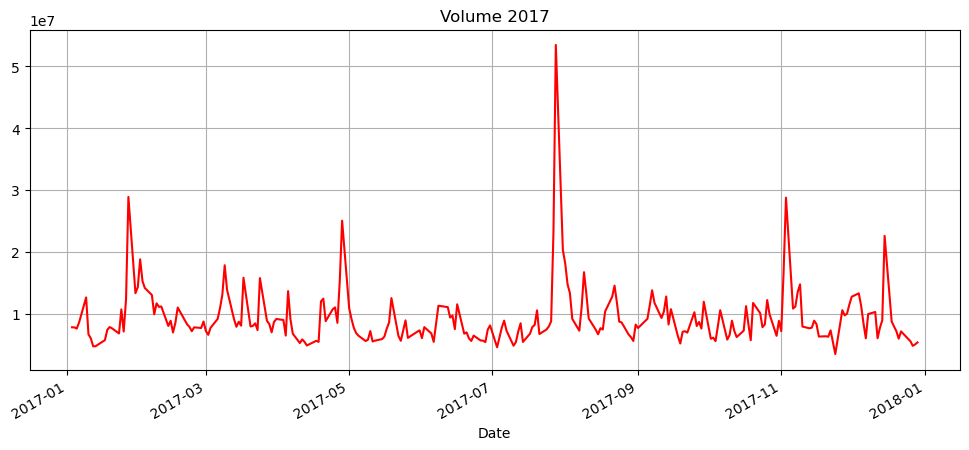

In [91]:
df['Volume']['2017-01-01':'2017-12-31'].plot(figsize = (12,5), grid = True, color = 'red', title = 'Volume 2017')

### Modifying tickmarks spacing

In [92]:
from matplotlib import dates

#### Major Axes

<Axes: xlabel='Date'>

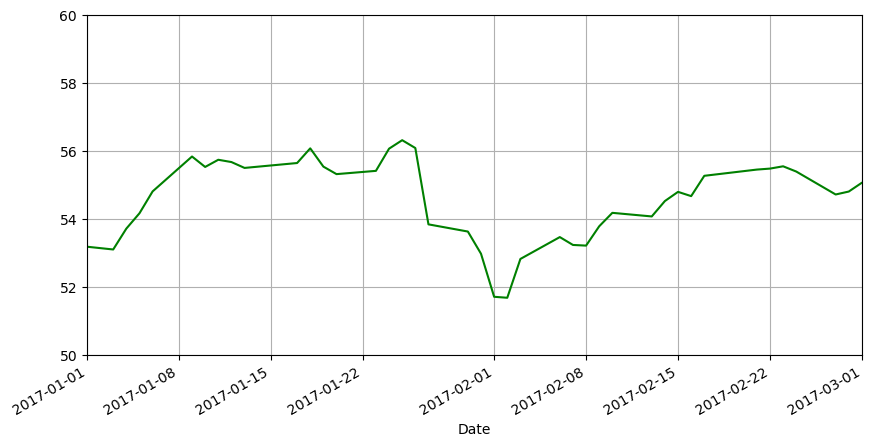

In [99]:
df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], figsize = (10, 5), ylim = [50, 60], color = "green", grid = True)

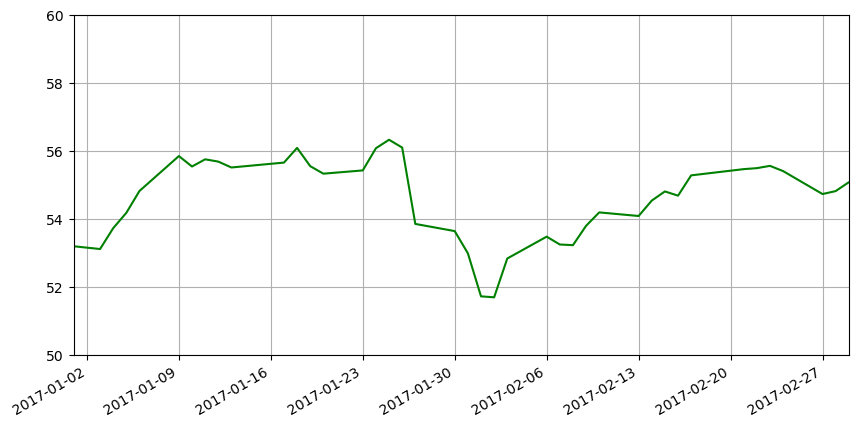

In [98]:
# setting dates one week apart
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], figsize = (10, 5), ylim = [50, 60], color = "green", grid = True)
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))

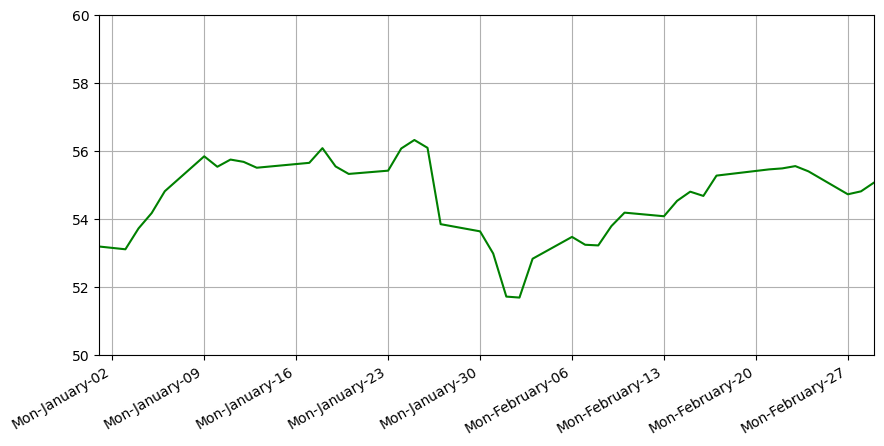

In [100]:
## formatting datetime index
# setting dates one week apart
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], figsize = (10, 5), ylim = [50, 60], color = "green", grid = True)
ax.set(xlabel = '')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

#### Minor Axes

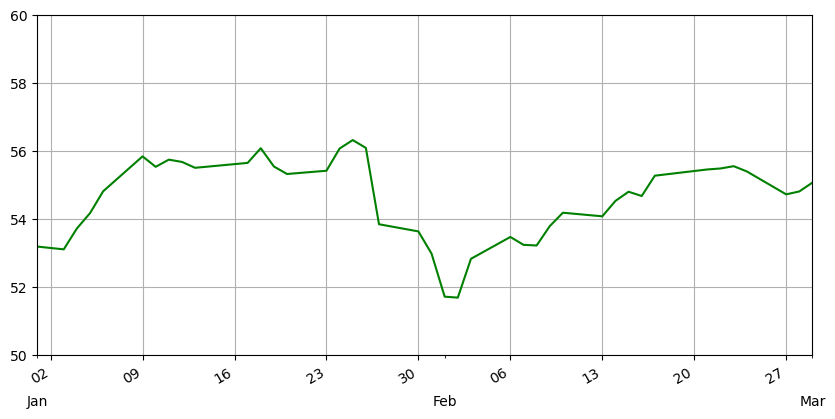

In [103]:
ax = df['Close'].plot(xlim = ['2017-01-01','2017-03-01'], figsize = (10, 5), ylim = [50, 60], color = "green", grid = True)
ax.set(xlabel = '')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday = 0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))